## Capstone Project - India Crime Phase 3

## SQL Operations

3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sqlite3

In [2]:
df1 = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [3]:
df1

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
8592,DELHI,STF,2012,0,0,0,0,0,0,0
8593,DELHI,WEST,2012,79,256,18,53,6,327,0
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
8595,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0


3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [4]:
df1.rename(columns={'Kidnapping and Abduction': 'Kidnapping'}, inplace = True)

In [5]:
# Creating a connection to a SQLite database
conn = sqlite3.connect('crime.db')

# Inserting the DataFrame into a SQLite table
df1.to_sql('crimes_women', conn, if_exists='replace', index=False)

8597

In [6]:
query_1 = """
        SELECT [STATE/UT], DISTRICT, Year, MAX(Rape) as MaxRape, MAX(Kidnapping) as MaxKidnapping
        FROM crimes_women
        GROUP BY [STATE/UT], DISTRICT, Year
        ORDER BY MaxRape DESC, MaxKidnapping DESC
        LIMIT 1
        """
result_1 = pd.read_sql_query(query_1, conn)
print(result_1)

      STATE/UT     DISTRICT  Year  MaxRape  MaxKidnapping
0  WEST BENGAL  MURSHIDABAD  2009      568            342


Note - In the above result, i have made some changes in excel as the total value per state is coming after every district and because of which the result coming was not accurate. Hence i have removed all the rows having total value in district.

3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [7]:
query = """
        SELECT [STATE/UT], DISTRICT, Year, MIN(Rape) as MinRape, MIN(Kidnapping) as MinKidnapping
        FROM crimes_women
        GROUP BY [STATE/UT], DISTRICT, Year
        ORDER BY MinRape ASC, MinKidnapping ASC
        """
result = pd.read_sql_query(query, conn)
print(result)

           STATE/UT     DISTRICT  Year  MinRape  MinKidnapping
0     A & N ISLANDS      NICOBAR  2001        0              0
1     A & N ISLANDS      NICOBAR  2003        0              0
2     A & N ISLANDS      NICOBAR  2004        0              0
3     A & N ISLANDS      NICOBAR  2005        0              0
4     A & N ISLANDS      NICOBAR  2006        0              0
...             ...          ...   ...      ...            ...
8591    WEST BENGAL   JALPAIGURI  2008      334            239
8592    WEST BENGAL  MURSHIDABAD  2007      369            123
8593    WEST BENGAL  MURSHIDABAD  2011      433            492
8594    WEST BENGAL  MURSHIDABAD  2010      526            441
8595    WEST BENGAL  MURSHIDABAD  2009      568            342

[8596 rows x 5 columns]


3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [8]:
df2 = pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')
df2

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
8593,DELHI,WEST,2012,0,0,0,0,0,0,0,0,0,0
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
8595,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0


3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [9]:
df2.to_sql('df2', conn, if_exists='replace', index=False)

8597

In [10]:
df2.rename(columns = {'Dacoity': 'Dacoity', 'Robbery': 'Robbery'}, inplace = True )

In [11]:
query1 ='''SELECT "STATE/UT", DISTRICT, MAX(Dacoity + Robbery) AS "[Highest Dacoity/Robbery]"
               FROM df2
               GROUP BY [STATE/UT], DISTRICT
               ORDER BY "[Highest Dacoity/Robbery]" DESC
               LIMIT 1'''

In [12]:
result1 = pd.read_sql_query(query1, conn)
print(result1)

  STATE/UT DISTRICT  [Highest Dacoity/Robbery]
0  GUJARAT    DAHOD                         60


3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [13]:
query2 = ''' SELECT "STATE/UT", DISTRICT, MIN(Murder) as MINMurder
             FROM df2
             GROUP BY [STATE/UT], DISTRICT
             ORDER BY MINMurder ASC'''

In [14]:
result2 = pd.read_sql_query(query2, conn)
print(result2)

          STATE/UT         DISTRICT  MINMurder
0    A & N ISLANDS  A and N ISLANDS          0
1    A & N ISLANDS          ANDAMAN          0
2    A & N ISLANDS              CAR          0
3    A & N ISLANDS          NICOBAR          0
4    A & N ISLANDS            NORTH          0
..             ...              ...        ...
828    WEST BENGAL  SILIGURI G.R.P.          0
829    WEST BENGAL      SILIGURI_PC          0
830    WEST BENGAL   UTTAR DINAJPUR          0
831   CHHATTISGARH        KONDAGAON          1
832   CHHATTISGARH          MUNGELI          1

[833 rows x 3 columns]


3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [15]:
query2 = ''' SELECT "STATE/UT",DISTRICT, Year, Murder
             FROM df2
             GROUP BY [STATE/UT], DISTRICT, Year
             ORDER BY Murder ASC '''

In [16]:
result3 = pd.read_sql_query(query2,conn)
print(result3)

           STATE/UT         DISTRICT  Year  Murder
0     A & N ISLANDS  A and N ISLANDS  2007       0
1     A & N ISLANDS          ANDAMAN  2001       0
2     A & N ISLANDS          ANDAMAN  2002       0
3     A & N ISLANDS          ANDAMAN  2003       0
4     A & N ISLANDS          ANDAMAN  2004       0
...             ...              ...   ...     ...
8591      JHARKHAND          SIMDEGA  2003      22
8592       NAGALAND           KOHIMA  2002      22
8593       NAGALAND           KOHIMA  2003      23
8594       NAGALAND           KOHIMA  2001      24
8595       NAGALAND           KOHIMA  2006      28

[8596 rows x 4 columns]


3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [17]:
df3 = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df3

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8593,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [26]:
df3.to_sql('df3', conn, if_exists = 'replace', index = False)

8597

3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [28]:
query3 = '''SELECT [STATE/UT], YEAR, DISTRICT, MAX(MURDER) AS MURDERS
FROM df3
GROUP BY [STATE/UT], YEAR
ORDER BY [STATE/UT], YEAR '''

In [29]:
result4 = pd.read_sql_query(query3,conn)
print(result4)

          STATE/UT  YEAR           DISTRICT  MURDERS
0    A & N ISLANDS  2001            ANDAMAN       13
1    A & N ISLANDS  2002            ANDAMAN       14
2    A & N ISLANDS  2003            ANDAMAN       16
3    A & N ISLANDS  2004            ANDAMAN       13
4    A & N ISLANDS  2005            ANDAMAN       14
..             ...   ...                ...      ...
415    WEST BENGAL  2008  24 PARGANAS SOUTH      239
416    WEST BENGAL  2009  24 PARGANAS NORTH      229
417    WEST BENGAL  2010   PASCHIM MIDNAPUR      268
418    WEST BENGAL  2011  24 PARGANAS SOUTH      247
419    WEST BENGAL  2012  24 PARGANAS SOUTH      224

[420 rows x 4 columns]


3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [32]:
df4 = pd.DataFrame(result4)

In [33]:
df4

,STATE/UT,YEAR,DISTRICT,MURDERS
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
417,WEST BENGAL,2010,PASCHIM MIDNAPUR,268
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247


In [39]:
vc = df4['DISTRICT'].value_counts()
vc

WEST                14
BANGALORE COMMR.    12
DAMAN               12
D and N HAVELI      12
CHANDIGARH          12
                    ..
SOPORE               1
SRINAGAR             1
DODA                 1
POONCH               1
PASCHIM MIDNAPUR     1
Name: DISTRICT, Length: 92, dtype: int64

In [41]:
fv = vc[vc >=3].index
fv

Index(['WEST', 'BANGALORE COMMR.', 'DAMAN', 'D and N HAVELI', 'CHANDIGARH',
       'PATNA', 'LAKSHADWEEP', 'AIZAWL', 'KANGRA', 'ANDAMAN', 'DIMAPUR',
       'NORTH GOA', 'RANCHI', 'HARIDWAR', 'EAST', 'LOHIT', 'CHENNAI',
       'JAINTIA HILLS', 'SURAT COMMR.', '24 PARGANAS NORTH', 'CYBERABAD',
       'MUMBAI COMMR.', 'PONDICHERRY', 'ALWAR', 'JHABUA', 'BILASPUR', 'INDORE',
       'MAYURBHANJ', 'MUMBAI', 'PUDUCHERRY', 'JALANDHAR', 'MUZAFFARNAGAR',
       'BARAMULLA', 'PALAKKAD', 'DIBRUGARH', 'GURGAON', 'TINSUKIA',
       'NORTH WEST', 'BHARATPUR', 'OUTER', 'LUDHIANA', 'SONIPAT', 'KEONJHAR',
       'THOUBAL', 'SUNDARGARH', 'IMPHAL(WEST)', 'AHMEDABAD COMMR.', 'SARGUJA',
       'KHASI HILLS EAST', 'IMPHAL WEST', 'CP LUDHIANA', 'JAMMU',
       '24 PARGANAS SOUTH'],
      dtype='object')

In [43]:
rdf = df4[df4['DISTRICT'].isin(fv)]
rdf

,STATE/UT,YEAR,DISTRICT,MURDERS
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
414,WEST BENGAL,2007,24 PARGANAS NORTH,194
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247


In [45]:
fdf = df4[df4.groupby('DISTRICT')['DISTRICT'].transform('count')>=3]

In [46]:
sdf = fdf.sort_values(by = list(fdf.columns), ascending = False)
sdf

,STATE/UT,YEAR,DISTRICT,MURDERS
419,WEST BENGAL,2012,24 PARGANAS SOUTH,224
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
414,WEST BENGAL,2007,24 PARGANAS NORTH,194
...,...,...,...,...
4,A & N ISLANDS,2005,ANDAMAN,14
3,A & N ISLANDS,2004,ANDAMAN,13
2,A & N ISLANDS,2003,ANDAMAN,16
1,A & N ISLANDS,2002,ANDAMAN,14


In [47]:
fdf

,STATE/UT,YEAR,DISTRICT,MURDERS
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
414,WEST BENGAL,2007,24 PARGANAS NORTH,194
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247


In [48]:
fdf['DISTRICT'].value_counts()

WEST                 14
LAKSHADWEEP          12
BANGALORE COMMR.     12
PATNA                12
CHANDIGARH           12
D and N HAVELI       12
DAMAN                12
KANGRA               11
AIZAWL               11
NORTH GOA            10
RANCHI               10
DIMAPUR              10
ANDAMAN              10
HARIDWAR             10
SURAT COMMR.          9
EAST                  9
CHENNAI               9
JAINTIA HILLS         9
LOHIT                 9
24 PARGANAS NORTH     8
PONDICHERRY           7
MUMBAI COMMR.         7
CYBERABAD             7
JHABUA                6
ALWAR                 6
INDORE                6
BILASPUR              6
PALAKKAD              5
MUMBAI                5
DIBRUGARH             5
TINSUKIA              5
MUZAFFARNAGAR         5
BARAMULLA             5
GURGAON               5
JALANDHAR             5
MAYURBHANJ            5
PUDUCHERRY            5
LUDHIANA              4
SONIPAT               4
KEONJHAR              4
NORTH WEST            4
BHARATPUR       

Above are the districts which are repeated for 3 or more then 3 times.

In [49]:
import matplotlib.pyplot as plt

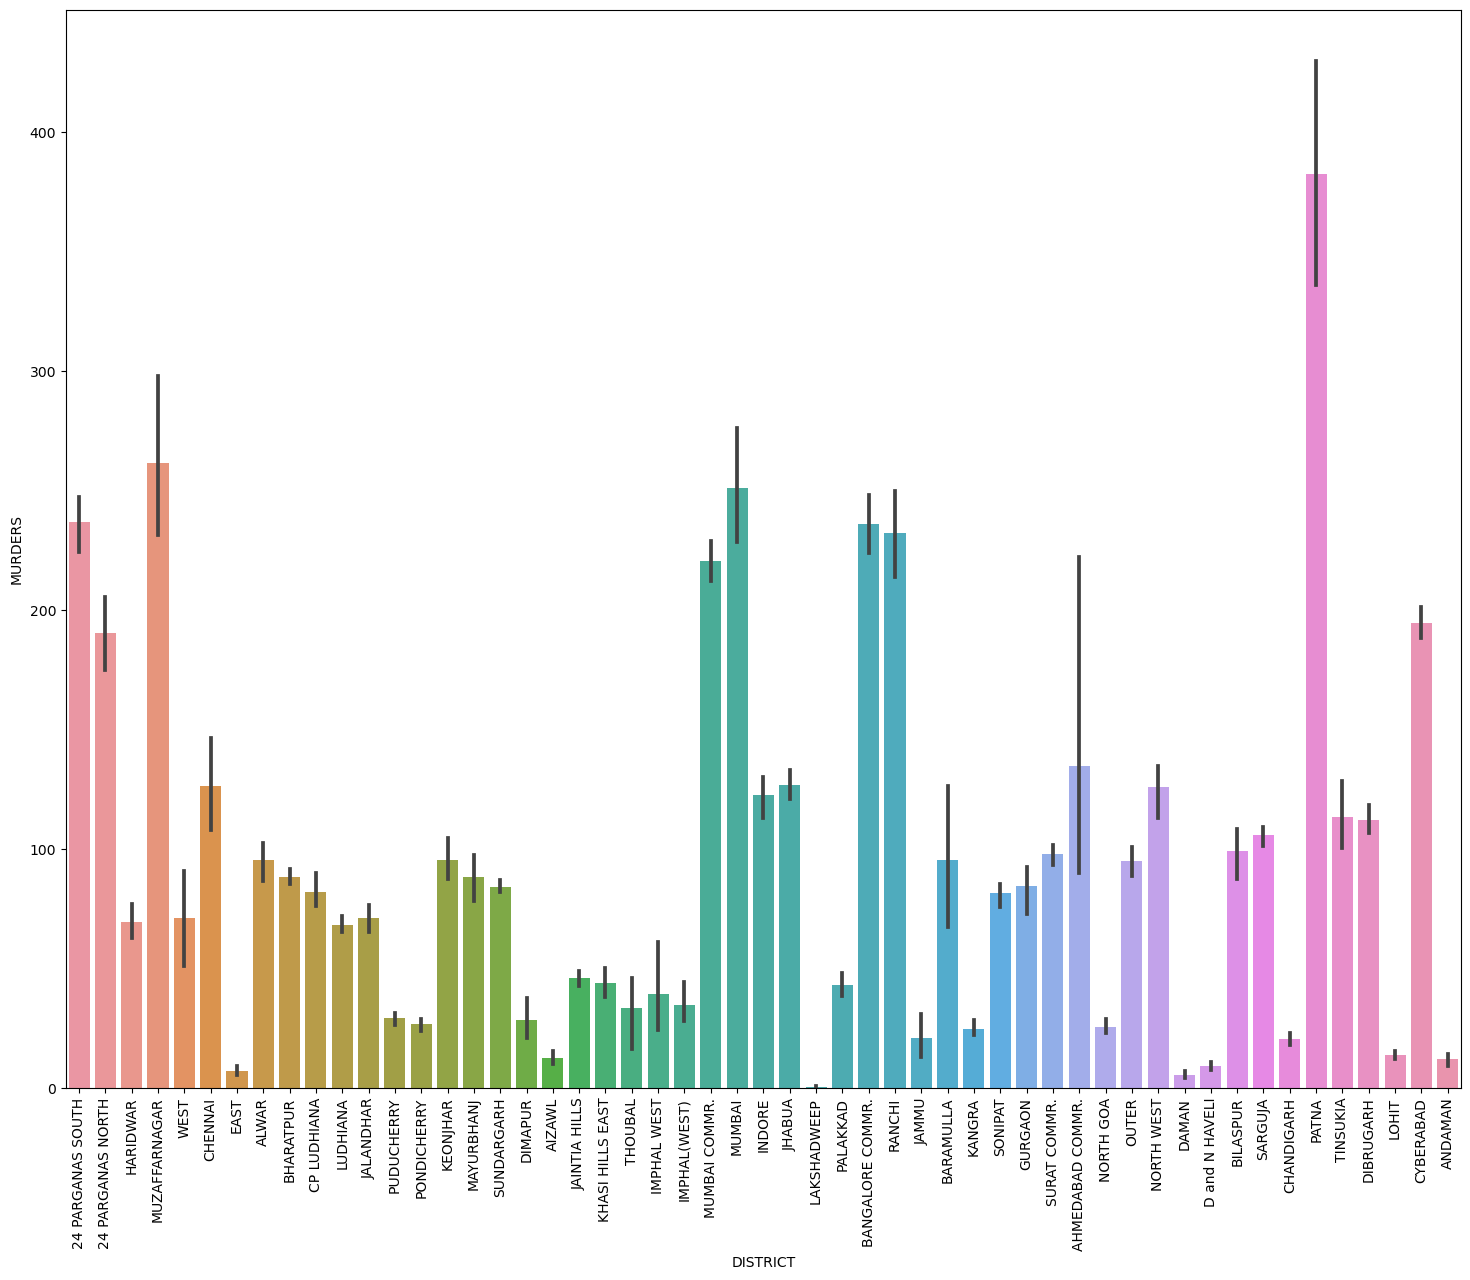

In [53]:
plt.figure(figsize = (18,14))
sns.barplot(x = 'DISTRICT', y = 'MURDERS', data = sdf)
plt.xticks(rotation='90')
plt.show()

The above graphs shows the number of murders the districts which are repeated 3 or more then 3 times.

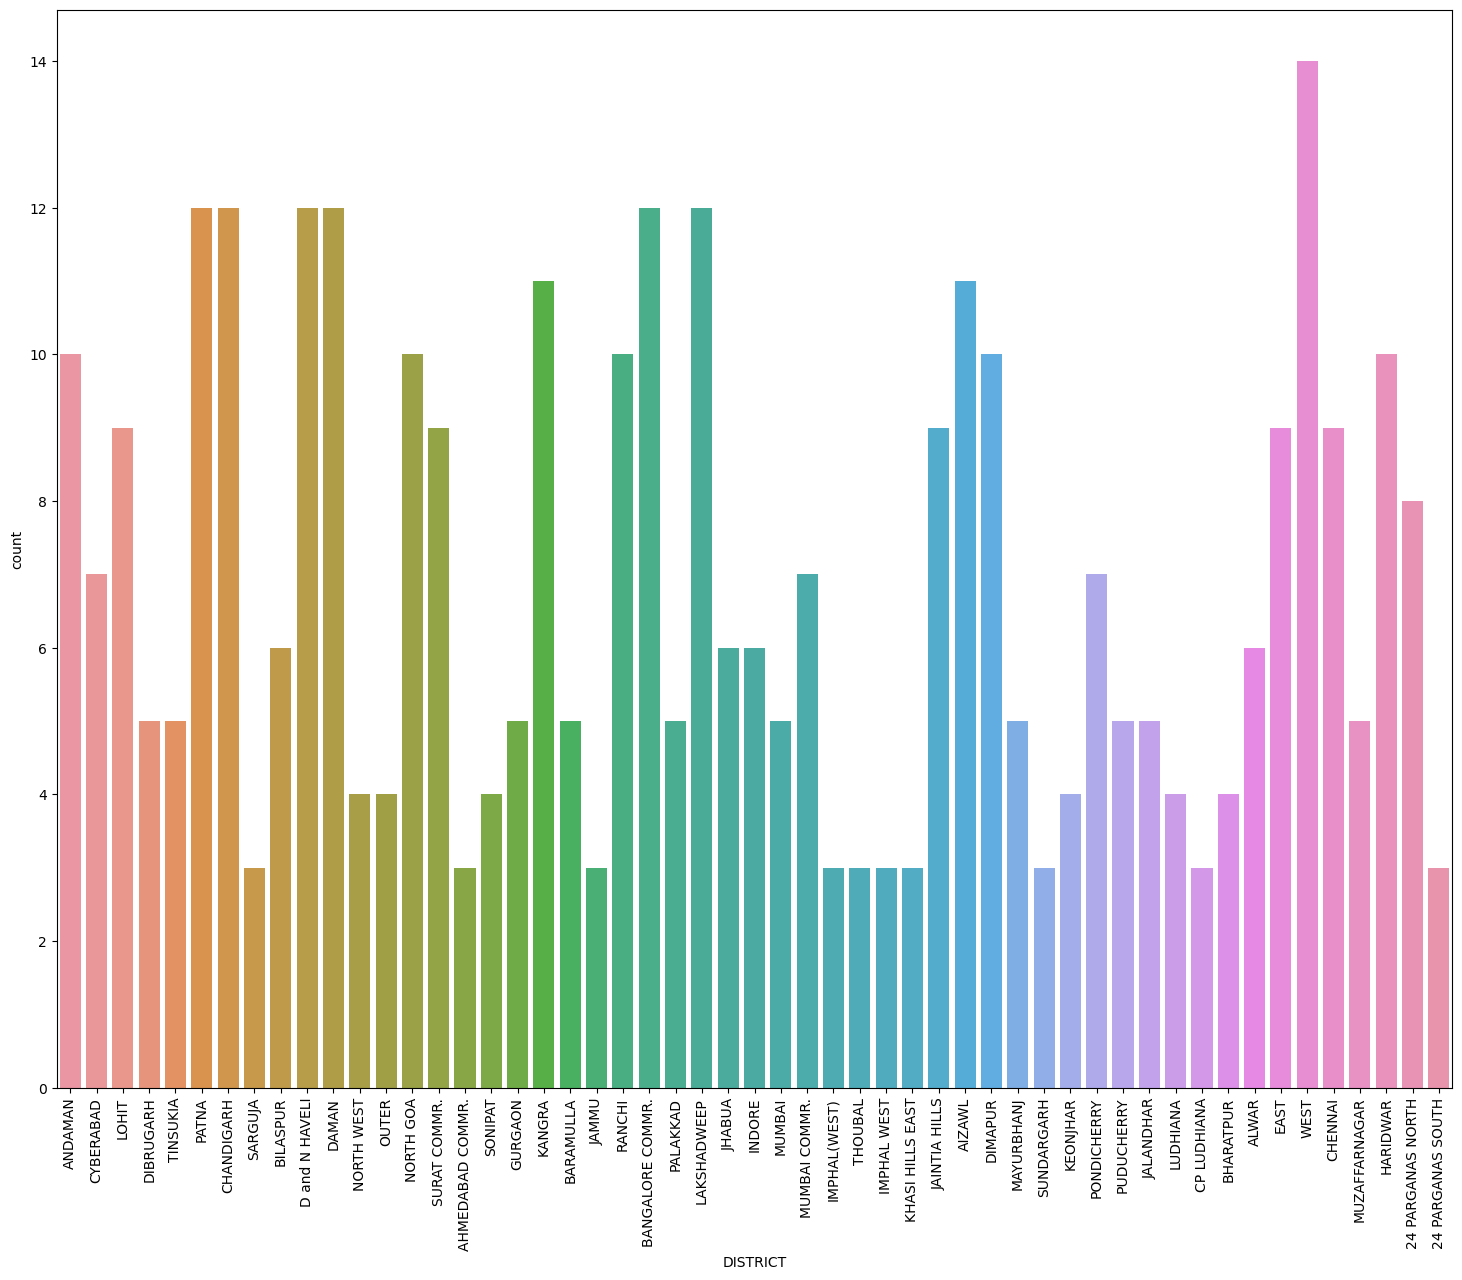

In [57]:
plt.figure(figsize = (18,14))
sns.countplot(fdf['DISTRICT'])
plt.xticks(rotation = '90')
plt.show()

The above graphs shows the number of repeations of the particular disctrict in a dataframe.

## Phase 3 Completed